In [112]:
import MDAnalysis
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
import numpy as np
import csv
from scipy.stats import linregress

import matplotlib.font_manager as font_manager

#plt.rcParams.update({'font.family':'sans-serif'})
#plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

### nAtoms vs Timing correlations

In [113]:
np.linspace(0,7000,num=8,endpoint=True)
temp = np.array(list(enumerate(np.linspace(0,8000,num=9,endpoint=True))))
print(temp)
labels = ['%d - %d'%(temp[i,1],temp[i+1,1]) for i in range(temp.shape[0]-1)]
#labels = [print(i) for i in range(temp.shape[0])]

print(labels)
sorted_data = [[] for i in range(temp.shape[0]-1)]
print(sorted_data)

box_ranges = np.array(list(enumerate(np.linspace(0,8000,num=9,endpoint=True))))
labels = ['%d - %d'%(box_ranges[i,1],box_ranges[i+1,1]) for i in range(box_ranges.shape[0]-1)]
print(labels)

[[0.e+00 0.e+00]
 [1.e+00 1.e+03]
 [2.e+00 2.e+03]
 [3.e+00 3.e+03]
 [4.e+00 4.e+03]
 [5.e+00 5.e+03]
 [6.e+00 6.e+03]
 [7.e+00 7.e+03]
 [8.e+00 8.e+03]]
['0 - 1000', '1000 - 2000', '2000 - 3000', '3000 - 4000', '4000 - 5000', '5000 - 6000', '6000 - 7000', '7000 - 8000']
[[], [], [], [], [], [], [], []]
['0 - 1000', '1000 - 2000', '2000 - 3000', '3000 - 4000', '4000 - 5000', '5000 - 6000', '6000 - 7000', '7000 - 8000']


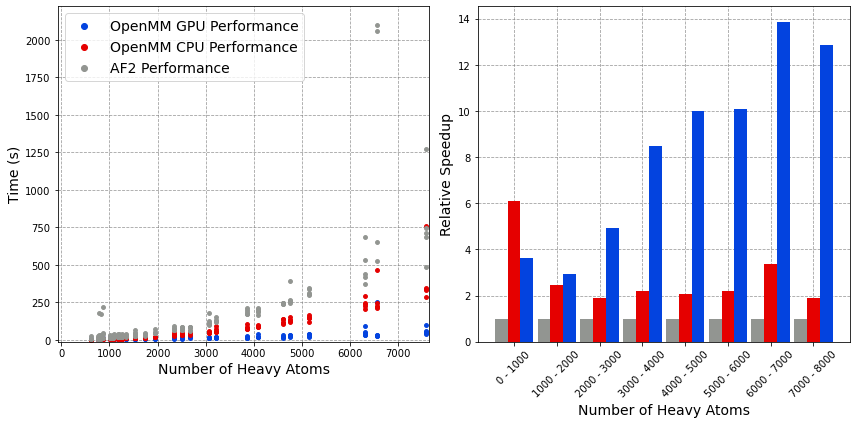

In [115]:
# prepping figure
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.set_ylabel('Time (s)',size=14,fontname="Arial")
ax1.set_xlabel('Number of Heavy Atoms',size=14,fontname="Arial")
#ax1.set_title('Computational Efficiency',size=18)
#f.suptitle('Computational Efficiency of Minimization Methods',size=18)

ax2.set_ylabel('Relative Speedup',size=14,fontname="Arial")
ax2.set_xlabel('Number of Heavy Atoms',size=14,fontname="Arial")
#ax2.set_title('Efficiency Boost',size=18)

box_ranges = np.array(list(enumerate(np.linspace(0,8000,num=9,endpoint=True))))
labels = ['%d - %d'%(box_ranges[i,1],box_ranges[i+1,1]) for i in range(box_ranges.shape[0]-1)]
width = 0.3

### OPENMM GPU PLATFORM 
output_dir = "/gpfs/alpine/proj-shared/bip198/minimize_af/script_home/casp14_refinement2/"
timing_csv = output_dir + 'timings.csv'
with open(timing_csv) as timing_file:
    csv_reader = csv.reader(timing_file)
    header = []
    header = next(csv_reader)
    timing_data = []
    for row in csv_reader:
        row = [row[0],row[1],float(row[2]),float(row[3]),row[4]]
        timing_data.append(row)

timing_data_array = np.array(timing_data)
n_atoms_vs_time = []
for row in timing_data_array:
    u = MDAnalysis.Universe(row[-1])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[3]) - float(row[2])
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

ax1.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=15,c='xkcd:blue',label='OpenMM GPU Performance',zorder=2)
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='OpenMM GPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='OpenMM GPU Performance')

sorted_data = [[] for i in range(box_ranges.shape[0]-1)]
for data in n_atoms_vs_time:
    for i in range(box_ranges.shape[0]-1):
        if data[0] > box_ranges[i,1] and data[0] <= box_ranges[i+1,1]:
            sorted_data[i].append(data[1])
    
omm_gpu_bar_mean = np.zeros(box_ranges.shape[0]-1)
omm_gpu_bar_std = np.zeros(box_ranges.shape[0]-1)
for i in range(box_ranges.shape[0]-1):
    omm_gpu_bar_mean[i] = np.mean(sorted_data[i])
    omm_gpu_bar_std[i]  = np.std(sorted_data[i])

### OPENMM CPU PLATFORM 
output_dir = "/gpfs/alpine/proj-shared/bip198/minimize_af/cpu_pipeline/"
timing_csv = output_dir + 'timings.csv'

with open(timing_csv) as timing_file:
    csv_reader = csv.reader(timing_file)
    header = []
    header = next(csv_reader)
    timing_data = []
    for row in csv_reader:
        row = [float(row[0]),float(row[1]),row[2]]
        timing_data.append(row)

timing_data_array = np.array(timing_data)
n_atoms_vs_time = []
for row in timing_data_array:
    u = MDAnalysis.Universe(row[-1])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[1]) - float(row[0])
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

ax1.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=15,c='xkcd:red',label='OpenMM CPU Performance',zorder=2)
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='OpenMM CPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='OpenMM CPU Performance')

sorted_data = [[] for i in range(box_ranges.shape[0]-1)]
for data in n_atoms_vs_time:
    for i in range(box_ranges.shape[0]-1):
        if data[0] > box_ranges[i,1] and data[0] <= box_ranges[i+1,1]:
            sorted_data[i].append(data[1])
    
omm_cpu_bar_mean = np.zeros(box_ranges.shape[0]-1)
omm_cpu_bar_std = np.zeros(box_ranges.shape[0]-1)
for i in range(box_ranges.shape[0]-1):
    omm_cpu_bar_mean[i] = np.mean(sorted_data[i])
    omm_cpu_bar_std[i]  = np.std(sorted_data[i])

### AF2 OPENMM CPU PLATFORM 
af_file_dir = "/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/"
refined_log_files = glob.glob(af_file_dir+"*/timings_str.json")

timings = []
for i, log_file in enumerate(refined_log_files):
    temp_path = ''
    for elem in log_file.split('/')[:-1]:
        temp_path += elem+'/'
    with open(log_file,'r') as test:
        temp_timings = []
        for line in test:
            if 'relax_model' in line:
                temp_timings.append([temp_path+'relaxed_model_'+line.split('relax_model_')[1][0]+'.pdb',float(line.split()[-1][:-1])])
        timings += temp_timings

n_atoms_vs_time = []
timing_data_array = np.array(timings)
for row in timing_data_array:
    u = MDAnalysis.Universe(row[0])
    hvy_atoms = u.select_atoms('not name H*')
    dt = float(row[1])
    if dt > 14000:
        continue
    n_atoms_vs_time.append([hvy_atoms.n_atoms,dt])
n_atoms_vs_time = np.array(n_atoms_vs_time)

ax1.scatter(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1],s=15,c='xkcd:grey',label='AF2 Performance',zorder=2)
#test = linregress(n_atoms_vs_time[:,0],n_atoms_vs_time[:,1])
#x = np.arange(0,np.max(n_atoms_vs_time[:,0])+1)
#y = np.array([test.slope * i + test.intercept for i in x])
#plt.plot(x,y,lw=2,c='k',label='AF2 OpenMM CPU Performance\ny = %.3f * x + %.3f\n'%(test.slope,test.intercept)+r'R$^{2}$ = %.3f'%(test.rvalue**2))
#plt.plot(x,y,lw=2,c='k',label='AF2 OpenMM CPU Performance')

sorted_data = [[] for i in range(box_ranges.shape[0]-1)]
for data in n_atoms_vs_time:
    for i in range(box_ranges.shape[0]-1):
        if data[0] > box_ranges[i,1] and data[0] <= box_ranges[i+1,1]:
            sorted_data[i].append(data[1])
    
af2_bar_mean = np.zeros(box_ranges.shape[0]-1)
af2_bar_std = np.zeros(box_ranges.shape[0]-1)
for i in range(box_ranges.shape[0]-1):
    af2_bar_mean[i] = np.mean(sorted_data[i])
    af2_bar_std[i]  = np.std(sorted_data[i])

af2_relative_speedup = []
omm_cpu_relative_speedup = []
omm_gpu_relative_speedup = []
for i in range(box_ranges.shape[0]-1):
    af2_relative_speedup.append(af2_bar_mean[i]/af2_bar_mean[i])
    omm_cpu_relative_speedup.append(af2_bar_mean[i]/omm_cpu_bar_mean[i])
    omm_gpu_relative_speedup.append(af2_bar_mean[i]/omm_gpu_bar_mean[i])

#ax2.bar(box_ranges[:-1,0]-width,af2_bar_mean,width,color='xkcd:green',label='AF2 OpenMM CPU Performance')
#ax2.bar(box_ranges[:-1,0],omm_cpu_bar_mean,width,color='xkcd:red',label='OpenMM CPU Performance')
#ax2.bar(box_ranges[:-1,0]+width,omm_gpu_bar_mean,width,color='xkcd:blue',label='OpenMM GPU Performance')

ax2.bar(box_ranges[:-1,0]-width,af2_relative_speedup,width,color='xkcd:grey',label='AF2 OpenMM CPU Performance',zorder=2)
ax2.bar(box_ranges[:-1,0],omm_cpu_relative_speedup,width,color='xkcd:red',label='OpenMM CPU Performance',zorder=2)
ax2.bar(box_ranges[:-1,0]+width,omm_gpu_relative_speedup,width,color='xkcd:blue',label='OpenMM GPU Performance',zorder=2)

ax2.set_xticks(box_ranges[:-1,0])
ax2.set_xticklabels(labels,rotation=45,ha='center')

lgnd = ax1.legend(fontsize=14)
for handle in lgnd.legendHandles:
    handle.set_sizes([36.0])
ax1.set_xlim((0-np.max(n_atoms_vs_time[:,0])*0.01,np.max(n_atoms_vs_time[:,0])+np.max(n_atoms_vs_time[:,0])*0.01))
#ax1.set_ylim((0-np.max(n_atoms_vs_time[:,1])*0.01,np.max(n_atoms_vs_time[:,1])+np.max(n_atoms_vs_time[:,1])*0.01))
ax1.set_ylim((0-2200*0.005,2200+2200*0.01))

ax1.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
ax2.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
f.set_tight_layout(True)

plt.savefig(output_dir + 'n_atom_vs_timing_correlation.png',dpi=600,transparent=True)
plt.show()

In [75]:
plt.close()